In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "../../data"
os.listdir(data_dir)

['bus_stops_wszone.dbf',
 'bus_stops_wszone.shp',
 'singstat',
 'origin_destination_bus_202001_scaleddown.csv.xz',
 'net_202001_weekendb.net',
 'OD_bus',
 'net_202001_weekdayb.net',
 'train_station_wszone.prj',
 'origin_destination_train_202001.csv.xz',
 'train_station_wszone.dbf',
 'OD_202001_weekend.csv.xz',
 'subzone_centroid.csv',
 'transport_node_bus_202001.csv',
 'train_station_wszone.cpg',
 'OD_PT',
 'train_station_wszone.shx',
 'planning-area-2014',
 'subzone_centroid_pos.json',
 '.ipynb_checkpoints',
 'origin_destination_bus_202001.csv.xz',
 'region-2014',
 'train_station_wszone.shp',
 'OD_train',
 'bus_stops_wszone.shx',
 'OD_202001_weekday.csv.xz',
 'bus_stops_wszone.prj',
 'subzone-2014',
 'bus_stops_wszone.cpg']

In [3]:
fp = os.path.join(data_dir, "origin_destination_bus_202001.csv.xz")
df = pd.read_csv(fp)
df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2020-01,WEEKENDS/HOLIDAY,16,BUS,4168,10051,80
1,2020-01,WEEKDAY,16,BUS,4168,10051,60
2,2020-01,WEEKENDS/HOLIDAY,14,BUS,80119,90079,80
3,2020-01,WEEKDAY,14,BUS,80119,90079,240
4,2020-01,WEEKDAY,17,BUS,20281,20141,260


In [4]:
fp2 = os.path.join(data_dir, "transport_node_bus_202001.csv")
df2 = pd.read_csv(fp2)
df2.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2020-01,WEEKENDS/HOLIDAY,6,BUS,67551,224,22
1,2020-01,WEEKDAY,6,BUS,67551,3922,122
2,2020-01,WEEKDAY,7,BUS,66541,648,364
3,2020-01,WEEKENDS/HOLIDAY,7,BUS,66541,127,109
4,2020-01,WEEKENDS/HOLIDAY,17,BUS,54209,736,325


In [10]:
df1_weekday = df[df["DAY_TYPE"]=="WEEKDAY"]
df1_weekend = df[df["DAY_TYPE"]=="WEEKENDS/HOLIDAY"]
df2_weekday = df2[df2["DAY_TYPE"]=="WEEKDAY"]
df2_weekend = df2[df2["DAY_TYPE"]=="WEEKENDS/HOLIDAY"]

In [30]:
#fig, ax = plt.subplots(figsize=(15,15))
#ax.set_aspect("equal")

for st in list(set(df2["PT_CODE"].tolist()))[:10]:
    temp2 = df2_weekday[df2_weekday["PT_CODE"]==st]
    temp1 = df1_weekday[df1_weekday["ORIGIN_PT_CODE"]==st]
    #print(temp1.head())
    #print(temp2.head())
    #hrs = sorted(set(temp1["TIME_PER_HOUR"].tolist()))
    #print(hrs)
    xs = []
    ys = []
    zs = []
    for hr in range(5,24):
        temp1b = temp1[temp1["TIME_PER_HOUR"]==hr]
        temp2b = temp2[temp2["TIME_PER_HOUR"]==hr]
        #print(temp1b.head())
        #print(temp2b.head())
        total_origin2 = temp2b["TOTAL_TAP_IN_VOLUME"].tolist()[0] if len(temp2b)>0 else 0
        total_origin1 = temp1b["TOTAL_TRIPS"].sum()
        #print(total_origin1, total_origin2)
        xs.append(total_origin1)
        ys.append(total_origin2)
        zs.append(total_origin2/total_origin1)
    #ax.scatter(xs, ys)
    print(zs)
    #break
ax.set_xscale("log")
ax.set_yscale("log")

[0.050187079072087803, 0.05010233319688907, 0.050097662030186445, 0.05004855940433797, 0.05015544041450777, 0.05028690662493479, 0.050218431454129395, 0.05027624309392265, 0.050268199233716476, 0.05037174721189591, 0.050360700790106495, 0.050265173836181495, 0.05031914893617021, 0.0502283105022831, 0.05014483424525266, 0.05044829647340108, 0.050449101796407186, 0.05130759651307597, 0.05]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, nan]
[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
[nan, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05016129032258065, 0.05, 0.05, 0.05, 0.05]
[nan, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
[nan, 0.05, 0.05, 0.05, nan, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, nan, nan, nan]


/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars


[0.05415129151291513, 0.0504078042539581, 0.050607511045655376, 0.050146842878120414, 0.050138121546961324, 0.050259605399792316, 0.05025466893039049, 0.05066964285714286, 0.05058757694459989, 0.05185724690458849, 0.0508585445625511, 0.050666666666666665, 0.05093803297328027, 0.051821862348178135, 0.05091799265605875, 0.05068181818181818, 0.050793650793650794, 0.05059288537549407, 0.05454545454545454]
[nan, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, nan]
[0.05049923195084485, 0.05003650249901724, 0.05010416110250521, 0.05014608382964378, 0.050130443507926954, 0.05012190547636909, 0.05095447870778267, 0.05081925888580791, 0.0504017029458216, 0.05035335689045936, 0.05030099560083352, 0.05036280108196299, 0.05044120142541999, 0.05076440611524892, 0.05035383777898748, 0.050747794963568967, 0.05017725661303518, 0.05083297736010252, 0.050245561012466945]
[nan, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, nan, 0.05, 0.05, nan, 0.05, 0.05

In [ ]:
def scale_down_out_based(df_od, df_st, st):
    

In [31]:
df2_sum = df2.groupby(["DAY_TYPE"])["TOTAL_TAP_IN_VOLUME", "TOTAL_TAP_OUT_VOLUME"].sum()
df2_sum

,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
DAY_TYPE,,
WEEKDAY,86118202,86131051
WEEKENDS/HOLIDAY,30038402,30043784


In [32]:
df2_sum.loc["WEEKDAY"]/23

TOTAL_TAP_IN_VOLUME     3.744270e+06
TOTAL_TAP_OUT_VOLUME    3.744828e+06
Name: WEEKDAY, dtype: float64

In [33]:
df2_sum.loc["WEEKENDS/HOLIDAY"]/8

TOTAL_TAP_IN_VOLUME     3754800.25
TOTAL_TAP_OUT_VOLUME    3755473.00
Name: WEEKENDS/HOLIDAY, dtype: float64

In [34]:
df_sum = df.groupby(["DAY_TYPE"])["TOTAL_TRIPS"].sum()
df_sum

DAY_TYPE
WEEKDAY             1717672614
WEEKENDS/HOLIDAY     599115814
Name: TOTAL_TRIPS, dtype: int64

In [35]:
df_sum.loc["WEEKDAY"]/23

74681418.0

In [36]:
df_sum.loc["WEEKENDS/HOLIDAY"]/8

74889476.75

In [37]:
target_val_weekday = df2_sum.loc["WEEKDAY"]/23
target_val_weekday_ave = (target_val_weekday["TOTAL_TAP_IN_VOLUME"] + target_val_weekday["TOTAL_TAP_OUT_VOLUME"])/2.
large_val_weekday = df_sum.loc["WEEKDAY"]/23

scaling_weekday = target_val_weekday_ave / large_val_weekday
scaling_weekday

0.05014030368653243

In [38]:
target_val_weekend = df2_sum.loc["WEEKENDS/HOLIDAY"]/8
target_val_weekend_ave = (target_val_weekend["TOTAL_TAP_IN_VOLUME"] + target_val_weekend["TOTAL_TAP_OUT_VOLUME"])/2.
large_val_weekend = df_sum.loc["WEEKENDS/HOLIDAY"]/8

scaling_weekend = target_val_weekend_ave / large_val_weekend
scaling_weekend

0.050142380317806136

In [39]:
df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2020-01,WEEKENDS/HOLIDAY,16,BUS,4168,10051,80
1,2020-01,WEEKDAY,16,BUS,4168,10051,60
2,2020-01,WEEKENDS/HOLIDAY,14,BUS,80119,90079,80
3,2020-01,WEEKDAY,14,BUS,80119,90079,240
4,2020-01,WEEKDAY,17,BUS,20281,20141,260


In [40]:
df_weekday = df[df["DAY_TYPE"]=="WEEKDAY"]
df_weekend = df[df["DAY_TYPE"]=="WEEKENDS/HOLIDAY"]

In [41]:
df_weekday["TOTAL_TRIPS_scl"] = df_weekday["TOTAL_TRIPS"] * scaling_weekday
df_weekday.head()

/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,TOTAL_TRIPS_scl
1,2020-01,WEEKDAY,16,BUS,4168,10051,60,3.008418
3,2020-01,WEEKDAY,14,BUS,80119,90079,240,12.033673
4,2020-01,WEEKDAY,17,BUS,20281,20141,260,13.036479
6,2020-01,WEEKDAY,7,BUS,19051,10017,20,1.002806
8,2020-01,WEEKDAY,14,BUS,81049,70161,40,2.005612


In [42]:
df_weekend["TOTAL_TRIPS_scl"] = df_weekend["TOTAL_TRIPS"] * scaling_weekend
df_weekend.head()

/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,TOTAL_TRIPS_scl
0,2020-01,WEEKENDS/HOLIDAY,16,BUS,4168,10051,80,4.011390
2,2020-01,WEEKENDS/HOLIDAY,14,BUS,80119,90079,80,4.011390
5,2020-01,WEEKENDS/HOLIDAY,17,BUS,20281,20141,40,2.005695
7,2020-01,WEEKENDS/HOLIDAY,17,BUS,11169,4219,18,0.902563
9,2020-01,WEEKENDS/HOLIDAY,14,BUS,81049,70161,20,1.002848


In [43]:
df_weekday["TOTAL_TRIPS_scl"].sum()/23, target_val_weekday_ave

(3744548.9782608678, 3744548.9782608696)

In [44]:
df_weekend["TOTAL_TRIPS_scl"].sum()/8, target_val_weekend_ave

(3755136.6250000014, 3755136.625)

In [45]:
temp1 = pd.DataFrame(df_weekday.groupby(["ORIGIN_PT_CODE", "DESTINATION_PT_CODE"])["TOTAL_TRIPS", "TOTAL_TRIPS_scl"].sum())

In [46]:
temp1["TOTAL_TRIPS_scl_day"] = temp1["TOTAL_TRIPS_scl"]/23
temp1["TOTAL_TRIPS_day"] = temp1["TOTAL_TRIPS"]/23

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


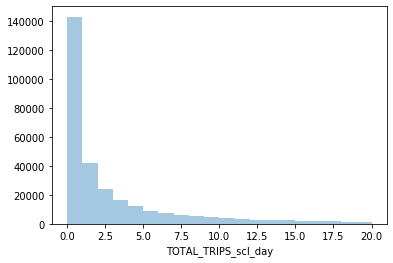

In [47]:
bins = bins=[ i*1 for i in range(21) ]
print(bins)
sns.distplot(temp1["TOTAL_TRIPS_scl_day"], bins=bins, kde=False)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


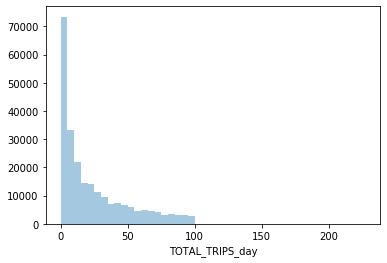

In [46]:
bins = bins=[ i*5 for i in range(21) ]
print(bins)
sns.distplot(temp1["TOTAL_TRIPS_day"], bins=bins, kde=False)

In [19]:
df_new = df_weekday
df_new = df_new.append(df_weekend)

In [34]:
df_new.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,TOTAL_TRIPS_scl
1,2020-01,WEEKDAY,16,BUS,4168,10051,60,3.008418
3,2020-01,WEEKDAY,14,BUS,80119,90079,240,12.033673
4,2020-01,WEEKDAY,17,BUS,20281,20141,260,13.036479
6,2020-01,WEEKDAY,7,BUS,19051,10017,20,1.002806
8,2020-01,WEEKDAY,14,BUS,81049,70161,40,2.005612


In [35]:
df_new = df_new[[ col for col in df_new if not(col=="TOTAL_TRIPS")]]
df_new.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS_scl
1,2020-01,WEEKDAY,16,BUS,4168,10051,3.008418
3,2020-01,WEEKDAY,14,BUS,80119,90079,12.033673
4,2020-01,WEEKDAY,17,BUS,20281,20141,13.036479
6,2020-01,WEEKDAY,7,BUS,19051,10017,1.002806
8,2020-01,WEEKDAY,14,BUS,81049,70161,2.005612


In [36]:
df_new = df_new.rename(columns={"TOTAL_TRIPS_scl": "TOTAL_TRIPS"})
df_new.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
1,2020-01,WEEKDAY,16,BUS,4168,10051,3.008418
3,2020-01,WEEKDAY,14,BUS,80119,90079,12.033673
4,2020-01,WEEKDAY,17,BUS,20281,20141,13.036479
6,2020-01,WEEKDAY,7,BUS,19051,10017,1.002806
8,2020-01,WEEKDAY,14,BUS,81049,70161,2.005612


In [37]:
fp_new = os.path.join(data_dir, "origin_destination_bus_202001_scaleddown.csv.xz")
df_new.to_csv(fp_new)

In [38]:
len(df), len(df_new)

(6835012, 6835012)